# Teorica

## Metropolis Montecarlo

Hasta ahora hablamos de 3 tecnicas para calcular la posterior:  
+ Analitica
+ Grid Approximation
  + si o si tenemos que calcularla en puntos de proba baja porque hay que normalizar
+ Aproximacion cuadrática o normal

Recordar el grid-sampling de grid approximation

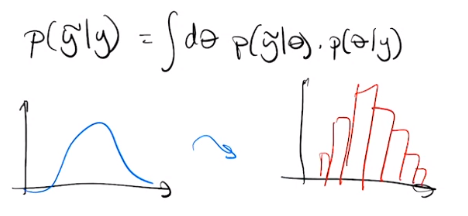

Habrá alguna manera de generar samples con distribución $f(x)$ sin saber $f(x)$

(generar el grafico rojo sin saber el azul)

Supogamos que tenemos $2$ bolitas una azul y otra roja

$P_{azul} = 0.2$  
$P_{roja} = 0.8$  

Arrancamos con AZUL
+ Cambio o no a ROJA?
  + Como la proba de la roja es mayor a la proba de la azul
  + La respuesta es SÍ
  + Siempre que tengo azul cambio a ROJA
+ Tengo ROJA
+ Cambio a AZUL?
  + Cambio con proba = $\theta$

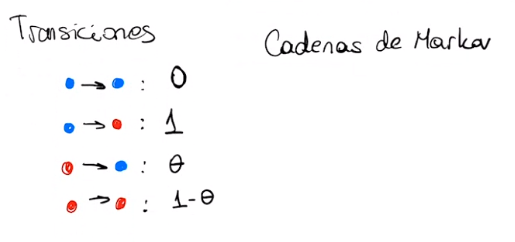  
Esto es una cadena de Markov

Usamos una matriz de transición

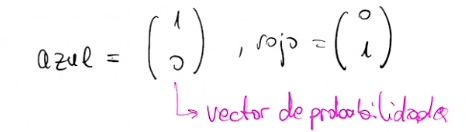
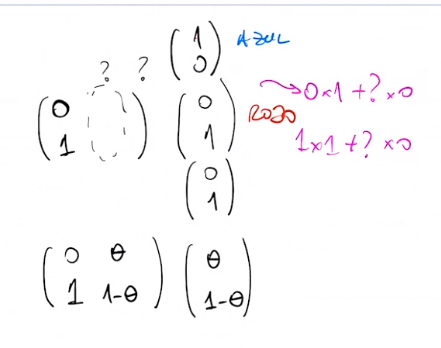

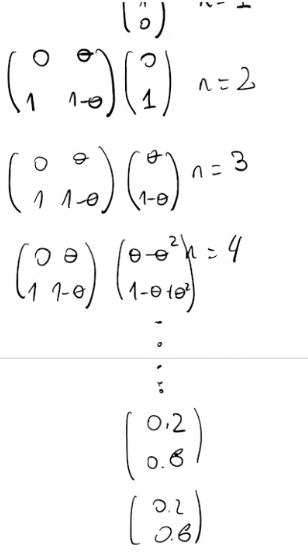

Despues de multiplicar por la matriz una gran cantidad de veces los valores deberian empezar a tender hacia las probabilidades

Entonces me pregunto:  
La matriz de Transicion * (1, 0) tiende a las probas
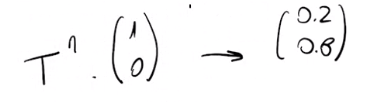

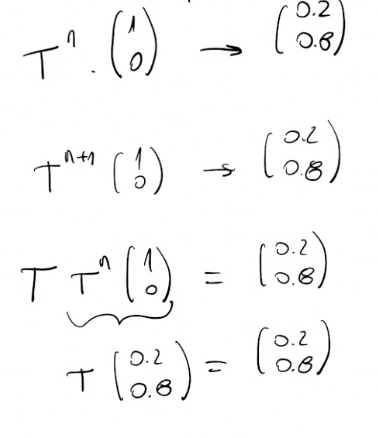

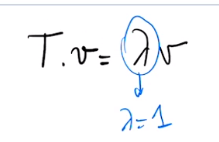  
Neceisto que T tenga autovector : $(0.2, 0.8)$ de autavalor 1

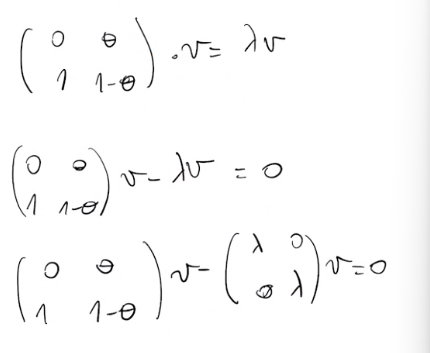
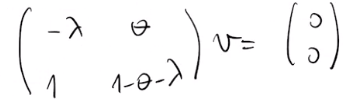

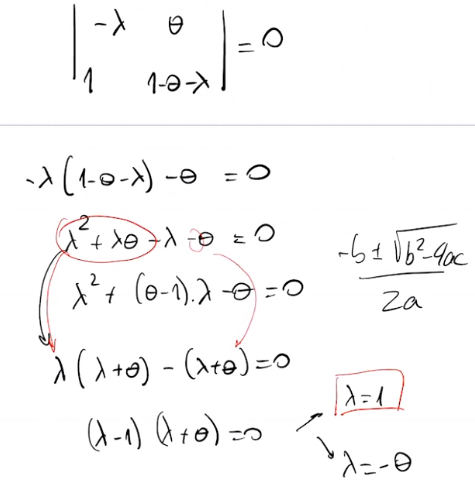

Va a existir el vector que multiplicado por T va a seguir en ese vector

Busco el $v$

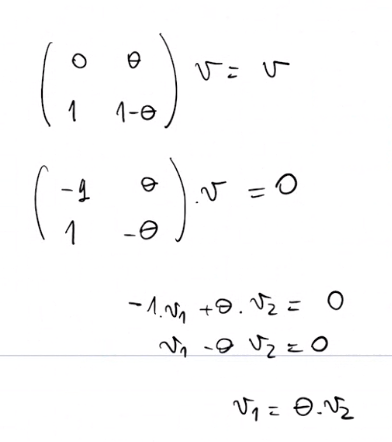  
entonces  
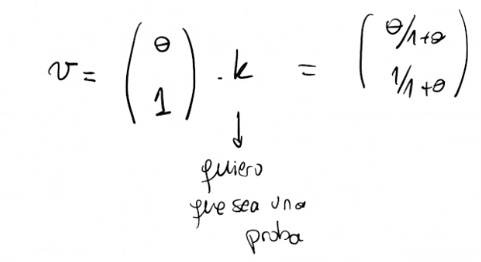

checkeamos:  
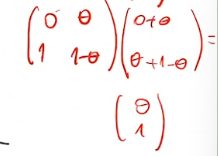

Bien

Veamos si cumple la igualdad que buscabamos para encontrar theta

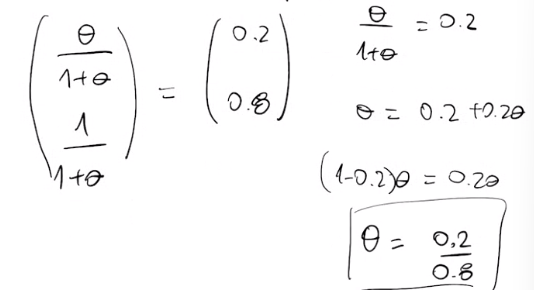

Entonces si vuelvo al preoceso de Markov $\theta$ es $\frac{0.2}{0.8}$

Asi se llega a la distribucion buscada

## Compu

In [11]:
import numpy as np

t = 0.2/0.8

transition_matrix = np.array([[0,t], [1, 1-t]])

def markov_chain(transition_matrix, initial_state, n_steps= 1000):
    states = [initial_state]
    current_state = initial_state
    for _ in range(n_steps):
        current_state = np.random.choice([0,1], p=transition_matrix[:, current_state])
        states.append(current_state)
    return states

In [12]:
chain = markov_chain(transition_matrix, 0)

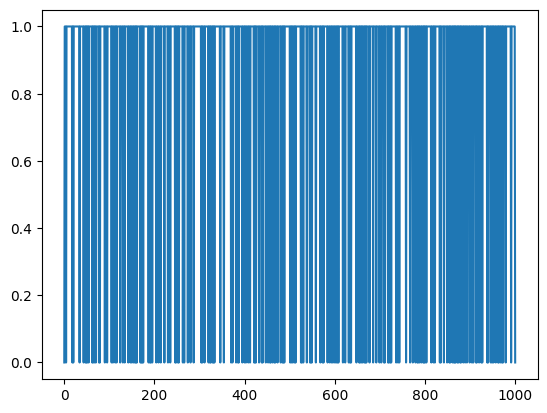

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(chain)

In [14]:
sum([v == 0 for v in chain])

199

In [15]:
sum([v == 1 for v in chain])

802

Bastante cercano a 20 % azules y 80% rojas

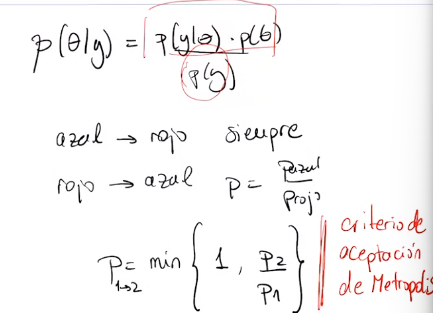

Para samplear una distribucion de probabilidad $f(y)$ simplemente tengo que __elegir un candidato__ y ver si lo acepto.

elegir un candidato: el criterio por el cual se va hacienda la cadena de Markov (algo asi)

Lo mismo que hicimos para el caso continuo antes, lo vamos a hacer ahora para una caso continuo

In [20]:
# binommial
x = 7
n = 10

# prior conjugado
alpha = 2
beta = 2

# posterior proporcional prior * likelihood
def markov_chain_binomial(p_initial, x, n, alpha, beta, n_steps = 1000):
    states = [p_initial]
    current_state = p_initial
    for _ in range(n_steps):
        p_proposal = np.random.random()   # candidato ahora no va a ser binario
        prior_current = current_state**(alpha - 1) * (1 - current_state)**(beta - 1)
        prior_proposal = p_proposal**(alpha - 1) * (1 - p_proposal)**(beta - 1)

        likelihood_current = current_state**x * (1 - current_state)**(n - x)
        likelihood_proposal = p_proposal**x * (1 - p_proposal)**(n - x)

        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        # ahora hago el cociente
        acceptance = np.min([1, p_proposal / p_current]) # criterio de aceptacion
        if np.random.random() < acceptance:
            current_state = p_proposal
        else:
            current_state = p_current
        states.append(current_state)
        return states

In [21]:
p_samples = markov_chain_binomial(0.5, x, n, alpha, beta)

In [22]:
p_samples

[0.5, 0.00035530206646481303]

Cualquiera, despues copiar la notebook que va a subir Pablo (seguro no la sube)

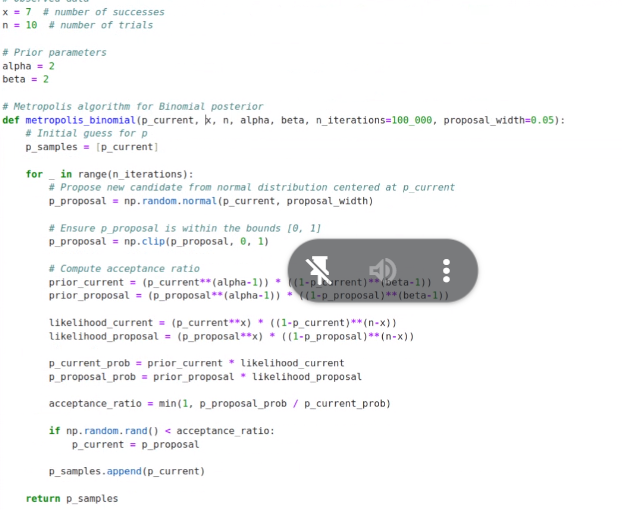

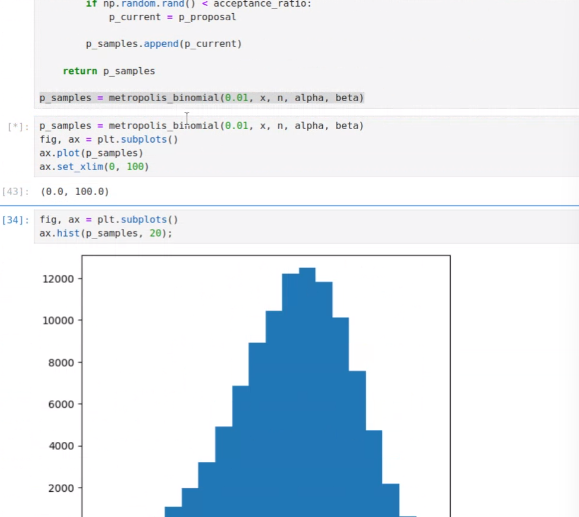

Me re perdi

# Practica

$X \sim Ber(p)$;  
 $x_n = $ sumar $n$ vaiid $x$  
no se que dice aca:
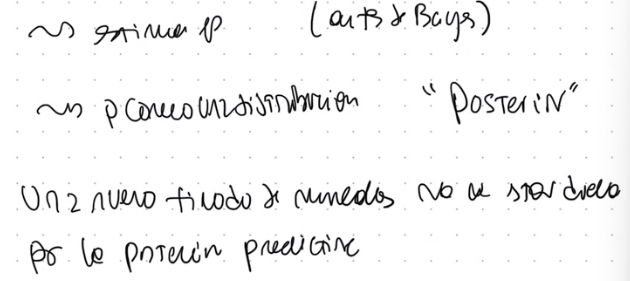

Esto esta explicado en el capitulo 3 del libro de McElreath

Supongamos que tenemos $X \sim Ber(p)$ y queremos estimar $p$ a partir de samples de $x$, $k$ exitos de $n$ samples

aproximacion por grilla:

+ partir [0,1] en pedacitos
+ prior = (1,1,1,1,1,1) la misma proba a todos
+ likelihood = (.....) vector de largo 1000, que en cada lugar tiene la probabilidad de que una $Bin(p = \frac{lugar}{1000}, n, k)$